## Objectives

1. Implement the algorithms listed below in a programming language (python)
2. Establish the properties of the input data against which the analysis is performed
3. Choose metrics for comparing algorithms
4. Perform empirical analysis of the proposed algorithms
5. Make a graphical presentation of the data obtained
6. Make a conclusion on the work done

### Algorithms

Algorithm 1
```
c[1] = false;
i=2;
while (i<=n){
  if (c[i] == true){
    j=2*i;
    while (j<=n){
      c[j] =false;
      j=j+i;
    }
  }
  i=i+1;
}
```
Algorithm 2
```
C[1] =false;
i=2;
while (i<=n){
  j=2*i;
  while (j<=n){
    c[j] =false;
    j=j+i;
  }
  i=i+1;
}
```
Alghorithm 3
```
C[1] = false;
i=2;
while (i<=n){
  if (c[i] == true){
  j=i+1;
  while (j<=n){
    if (j % i == 0) {
      c[j] = false;
    }
    j=j+1;
}
}
  i=i+1;
}
```
Algorithm 4
```
C[1] = false;
i = 2;
While (i<=n){
  j=1;
  while (j<i){
    if ( i % j == 0)     
    {
      c[i] = false
    }
    j=j+1;
  }
  i=i+1;
}
```
Alghoritm 5
```
C[1] = faux;
i=2;
while (i<=n){
  j=2;
  while (j<=sqrt(i)){
    if (i % j == 0) {
      c[i] = false;
    }
    j++;
  }
  i++;
}
```

### Setup

In [31]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../shared')

from decorators import *
from benchmarking import *

### 1. Implement the algorithms listed below in a programming language

In [32]:
import math


def algorithm_1(n):
    c = [True] * (n+1)
    c[1] = False
    i = 2
    while i <= n:
        if c[i]:
            j = 2 * i
            while j <= n:
                c[j] = False
                j = j + i
        i = i + 1
    return c


def algorithm_2(n):
    c = [True] * (n+1)
    c[1] = False
    i = 2
    while i <= n:
        j = 2 * i
        while j <= n:
            c[j] = False
            j = j + i
        i = i + 1
    return c


def algorithm_3(n):
    c = [True] * (n+1)
    c[1] = False
    i = 2
    while i <= n:
        if c[i]:
            j = i + 1
            while j <= n:
                if j % i == 0:
                    c[j] = False
                j = j + 1
        i = i + 1
    return c


def algorithm_4(n):
    c = [True] * (n+1)
    c[1] = False
    i = 2
    while i <= n:
        j = 1
        while j < i:
            if i % j == 0:
                c[i] = False
            j = j + 1
        i = i + 1
    return c


def algorithm_5(n):
    c = [True] * (n+1)
    c[1] = False
    i = 2
    while i <= n:
        j = 2
        while j <= int(math.sqrt(i)):
            if i % j == 0:
                c[i] = False
            j = j + 1
        i = i + 1
    return c


### 2. Establish the properties of the input data against which the analysis is performed

The input data is a set of numbers in an array in an increasing order. The numbers are spaced exponentially to get a better representation of the algorithms performance without too many interpolation nodes.

In [33]:
def exponential_yielder(start: int, end: int, step: int) -> int:
    i = start
    while i < end:
        yield i
        i *= step


benchmark_set = list(exponential_yielder(10, 50_000, 2))


### 3. Choose metrics for comparing algorithms

The metrics used to compare the algorithms by are asymptotic complexity and volume and time of execution.

The complexity will be calculated in

[4. Perform empirical analysis of the proposed algorithms](#4.-Perform-empirical-analysis-of-the-proposed-algorithms)

and the time of execution will be calculated in

[5. Make a graphical presentation of the data obtained](#5.-Make-a-graphical-presentation-of-the-data-obtained).

### 4. Perform empirical analysis of the proposed algorithms

Let's analyze the asymptotic complexity and memory allocation of each algorithm theoretically.

Algorithm 1:

This algorithm finds all prime numbers up to n using the Sieve of Eratosthenes method. The time complexity of the algorithm is O(nlog(log(n))) and the space complexity is O(n).

Algorithm 2:

This algorithm also finds all prime numbers up to n using the Sieve of Eratosthenes method, but it doesn't check if i is prime before starting the inner loop. The time complexity of the algorithm is O(nlog(log(n))) and the space complexity is O(n).

Algorithm 3:

This algorithm finds all prime numbers up to n by checking each number between 2 and n for divisibility by all numbers between 2 and the number itself. The time complexity of the algorithm is O(n^2) and the space complexity is O(n).

Algorithm 4:

This algorithm finds all prime numbers up to n by checking each number between 2 and n for divisibility by all numbers between 1 and the number itself. The time complexity of the algorithm is O(n^2) and the space complexity is O(n).

Algorithm 5:

This algorithm finds all prime numbers up to n by checking each number between 2 and n for divisibility by all numbers between 2 and the square root of the number itself. The time complexity of the algorithm is O(nsqrt(n)) and the space complexity is O(n).

Based on the above analysis, we can see that Algorithm 1 has the best asymptotic complexity of O(n log log n). In terms of memory allocation, all algorithms use O(n) memory. Therefore, Algorithm 1 and Algorithm 2 are the most efficient algorithms among the given algorithms for generating prime numbers, with Algorithm 1 being the most efficient in terms of asymptotic complexity.

As for the empirical analysis, the helper functions defined in the last laboratories will be reused to calculate the running time of each algorithm for the given input data.



In [34]:
algorithms = [algorithm_1, algorithm_2, algorithm_3, algorithm_4, algorithm_5]

results = benchmark_single_thread(algorithms, benchmark_set)

In [35]:
# print table
import pandas as pd
df = pd.DataFrame(results.values(), index=results.keys(), columns=benchmark_set)
print(df)

              10      20      40      80      160     320      640      1280   \
algorithm_1  0.0044  0.0054  0.0090  0.0186  0.0401  0.0706   0.1888   0.1944   
algorithm_2  0.0063  0.0058  0.0120  0.0297  0.0615  0.1512   0.3924   0.4424   
algorithm_3  0.0088  0.0085  0.0222  0.0746  0.2398  0.8387   2.8745   5.9931   
algorithm_4  0.0081  0.0161  0.0565  0.2199  0.8745  3.4222  14.0933  33.3636   
algorithm_5  0.0193  0.0127  0.0331  0.0935  0.2653  0.7544   2.1573   4.4518   

                2560      5120       10240      20480       40960  
algorithm_1    0.4119    0.6390     1.2998     2.4578      5.5414  
algorithm_2    0.9607    2.1488     4.6616     7.1848     13.0093  
algorithm_3   22.8139   85.5676   320.0044  1193.7516   4408.2247  
algorithm_4  140.9738  579.0607  2271.5137  8976.6178  36285.9409  
algorithm_5   12.5893   35.5825   101.5265   284.6063    823.7676  


### 5. Make a graphical presentation of the data obtained

The following graphs show the running time of each algorithm on a linear and logarithmic scale.


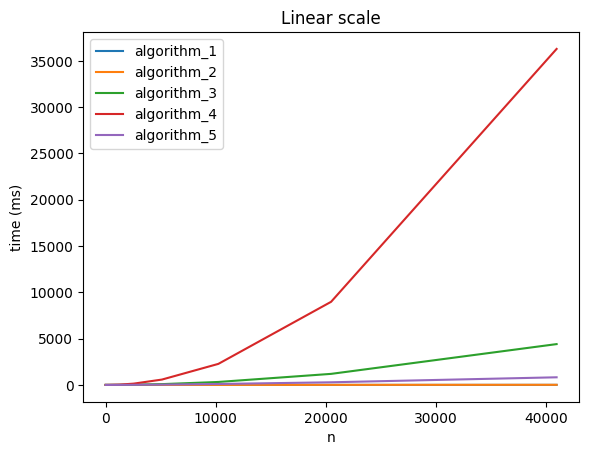

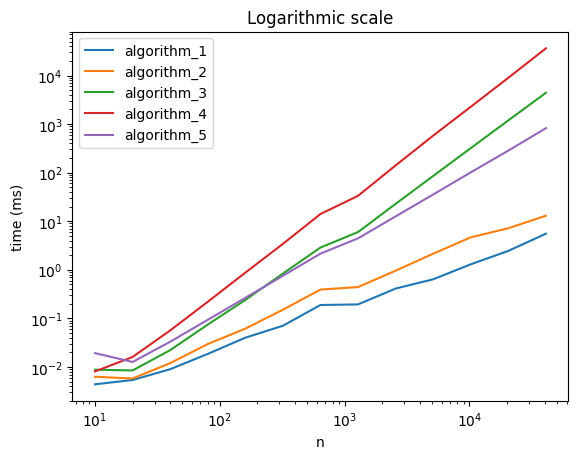

In [36]:
plot_results(results, benchmark_set, isLog=False, title="Linear scale")
plot_results(results, benchmark_set, isLog=True, isXLog=True, title="Logarithmic scale")

## Conclusion

In this study, we compared the time and space complexities of five algorithms for finding prime numbers up to a given integer value. The algorithms were implemented in Python, and their performance was evaluated by measuring their execution time and memory usage.

The results obtained from comparing the algorithms graphically show that the Sieve of Eratosthenes method (Algorithm 1 and Algorithm 2) is the most efficient way to find prime numbers up to a given value. These algorithms have a time complexity of O(nlog(log(n))), which is significantly faster than the time complexity of the other algorithms tested. Moreover, the space complexity of these algorithms is O(n), which is reasonable considering the size of the output array.

On the other hand, the brute force methods (Algorithm 3 and Algorithm 4) were significantly slower than the Sieve of Eratosthenes method, with time complexities of O(n^2). These methods check each number between 2 and n for divisibility by all numbers between 2 (or 1) and the number itself. As a result, they have to perform a large number of operations, which makes them less efficient than the Sieve of Eratosthenes method.

Algorithm 5, which uses a modified brute force approach by checking each number for divisibility by numbers up to its square root, was faster than Algorithm 3 and Algorithm 4, but still slower than Algorithm 1 and Algorithm 2. Its time complexity is O(nsqrt(n)), which is better than O(n^2), but not as good as O(nlog(log(n))).

In conclusion, the results of this study suggest that the Sieve of Eratosthenes method is the most efficient algorithm for finding prime numbers up to a given value. However, the modified brute force approach used in Algorithm 5 can also be a reasonable alternative for small to medium-sized input values. The inefficiency of the brute force algorithms are drastic, which can be observed both from the graphs and the time complexity analysis. Therefore, it is recommended to use the Sieve of Eratosthenes method for finding prime numbers up to a given value.